# Midterm Part 2 (Woosoo kim)

#### The following materials and tools are allowed: 
1. Lecture materials
2. Laptop

#### The following tools/actions are not allowed: 
1. ChatGPT
2. Web engine search
3. Communicating with anyone
4. Sharing any information about the midterm
5. Phones
6. All communication apps need to be turned off during the exam

## Problem 2

### In Problem 2, we will study whether fund managers possess skills by comparing the performance of random stock-picking strategies with that of mutual funds.

#### (1 point) 

#### Import the standard libraries

In [1]:
import numpy as np
import pandas as pd

#### (1 point) 

#### Bring in the csv file titled `mret.csv`.  Name the Dataframe: `mret`.

In [2]:
mret = pd.read_csv('mret.csv')
mret.head(10)

,permno,year,month,shrcd,exchcd,prc,ret,shrout
0,10000,1986,1,10.0,3.0,4.375000,NaN,3680.0
1,10000,1986,2,10.0,3.0,3.250000,-0.257143,3680.0
2,10000,1986,3,10.0,3.0,4.437500,0.365385,3680.0
3,10000,1986,4,10.0,3.0,4.000000,-0.098592,3793.0
4,10000,1986,5,10.0,3.0,3.109375,-0.222656,3793.0
5,10000,1986,6,10.0,3.0,3.093750,-0.005025,3793.0
6,10000,1986,7,10.0,3.0,2.843750,-0.080808,3793.0
7,10000,1986,8,10.0,3.0,1.093750,-0.615385,3793.0
8,10000,1986,9,10.0,3.0,1.031250,-0.057143,3793.0
9,10000,1986,10,10.0,3.0,0.781250,-0.242424,3843.0


#### (1 point) 

#### Keep observations with `shrcd` of 10 or 11 and `exchcd` of 1, 2, or 3.

#### Note that we keep ordinary common shares (shrcd of 10, 11) traded on the NYSE, AMEX, or NASDAQ (exchcd of 1, 2, or 3).

In [3]:
mret = mret[(mret['shrcd'].isin([10, 11])) & mret['exchcd'].isin([1, 2, 3])]

In [4]:
mret['shrcd'].unique()

array([10., 11.])

In [5]:
mret['exchcd'].unique()

array([3., 2., 1.])

#### (1 point) 

#### Drop observations with missing `ret`.

In [6]:
mret = mret.dropna(subset=['ret'])
mret.head(10)

,permno,year,month,shrcd,exchcd,prc,ret,shrout
1,10000,1986,2,10.0,3.0,3.250000,-0.257143,3680.0
2,10000,1986,3,10.0,3.0,4.437500,0.365385,3680.0
3,10000,1986,4,10.0,3.0,4.000000,-0.098592,3793.0
4,10000,1986,5,10.0,3.0,3.109375,-0.222656,3793.0
5,10000,1986,6,10.0,3.0,3.093750,-0.005025,3793.0
6,10000,1986,7,10.0,3.0,2.843750,-0.080808,3793.0
7,10000,1986,8,10.0,3.0,1.093750,-0.615385,3793.0
8,10000,1986,9,10.0,3.0,1.031250,-0.057143,3793.0
9,10000,1986,10,10.0,3.0,0.781250,-0.242424,3843.0
10,10000,1986,11,10.0,3.0,0.828125,0.060000,3843.0


### Step 1

#### (1 point) 

#### Using the Dataframe: `mret`, create a new column `rn` = uniformly distributed random numbers with seed = 1.

#### (Hint: Use `np.random.uniform(size=len(mret))`.)

In [7]:
np.random.seed(1)
mret['rn'] = np.random.uniform(size=len(mret))
mret.head(10)

,permno,year,month,shrcd,exchcd,prc,ret,shrout,rn
1,10000,1986,2,10.0,3.0,3.250000,-0.257143,3680.0,0.417022
2,10000,1986,3,10.0,3.0,4.437500,0.365385,3680.0,0.720324
3,10000,1986,4,10.0,3.0,4.000000,-0.098592,3793.0,0.000114
4,10000,1986,5,10.0,3.0,3.109375,-0.222656,3793.0,0.302333
5,10000,1986,6,10.0,3.0,3.093750,-0.005025,3793.0,0.146756
6,10000,1986,7,10.0,3.0,2.843750,-0.080808,3793.0,0.092339
7,10000,1986,8,10.0,3.0,1.093750,-0.615385,3793.0,0.186260
8,10000,1986,9,10.0,3.0,1.031250,-0.057143,3793.0,0.345561
9,10000,1986,10,10.0,3.0,0.781250,-0.242424,3843.0,0.396767
10,10000,1986,11,10.0,3.0,0.828125,0.060000,3843.0,0.538817


#### (2 point) 

#### Create a DataFrame `tempdf` by taking observations with the largest 50 values of `rn` within each month. 

#### Note that each month should have 50 firms. 

In [8]:
tempdf = mret.sort_values(['year', 'month', 'rn']).groupby(['year', 'month']).tail(50)
tempdf.head(10)

,permno,year,month,shrcd,exchcd,prc,ret,shrout,rn
930960,38711,1980,1,11.0,1.0,10.625,0.049383,3748.0,0.991105
820557,31536,1980,1,11.0,1.0,18.250,0.177419,15954.0,0.991286
413191,14605,1980,1,10.0,1.0,32.500,0.048387,5188.0,0.991357
954239,40141,1980,1,10.0,1.0,26.500,-0.040724,23606.0,0.991412
573485,18411,1980,1,11.0,1.0,11.250,0.011739,148745.0,0.991873
1436026,63626,1980,1,10.0,3.0,1.250,-0.090909,2943.0,0.992061
1129557,49568,1980,1,10.0,2.0,5.125,0.000000,1382.0,0.992325
591324,19298,1980,1,10.0,3.0,2.250,0.125000,1308.0,0.992379
852766,33582,1980,1,10.0,2.0,8.500,0.511111,5104.0,0.992459
832341,32352,1980,1,10.0,2.0,9.625,0.132353,1506.0,0.992735


#### (2 point) 

#### Calculate the average return of 50 firms in each month. 

#### The resulting DataFrame (name it `tempdf2`) should have 480 observations. 

#### Print `tempdf2.info()`.

In [9]:
tempdf2 = tempdf.groupby(['year', 'month'], as_index=False)['ret'].mean()
tempdf2.head(10)

,year,month,ret
0,1980,1,0.103002
1,1980,2,0.010708
2,1980,3,-0.170610
3,1980,4,0.053007
4,1980,5,0.065136
5,1980,6,0.045655
6,1980,7,0.131770
7,1980,8,0.071677
8,1980,9,0.033068
9,1980,10,0.164628


In [10]:
tempdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    480 non-null    int64  
 1   month   480 non-null    int64  
 2   ret     480 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.4 KB


#### (1 point) 

#### Create an arbitrary `permno` (i.e., tempdf2['permno'] = 12345).

In [11]:
tempdf2['permno'] = 12345
tempdf2.head(10)

,year,month,ret,permno
0,1980,1,0.103002,12345
1,1980,2,0.010708,12345
2,1980,3,-0.170610,12345
3,1980,4,0.053007,12345
4,1980,5,0.065136,12345
5,1980,6,0.045655,12345
6,1980,7,0.131770,12345
7,1980,8,0.071677,12345
8,1980,9,0.033068,12345
9,1980,10,0.164628,12345


### Step 2

#### (10 points)

#### Create an empty DataFrame `simdf` = `pd.DataFrame(columns=['permno','year','month','ret'])`.

#### Now we will iterate `Step 1` 100 times using a `for loop` (i.e., `for i in range(100)`) and append each DataFrame to `simdf`. 

#### For each iteration, 

1. Set seed = `i`. 

2. Using the Dataframe: `mret`, create a new column `rn` = uniformly distributed random numbers.

3. Create a DataFrame `tempdf` by taking observations with the largest 50 values of `rn` within each month.

4. Calculate the average return of 50 firms in each month and name the resulting DataFrame `tempdf2`.

5. Create an arbitrary `permno` (i.e., tempdf2['permno'] = `i`).

6. Stack `tempd2` to `simdf`.


#### After repeating `Step 1` 100 times, `simdf` should have 480 $\times$ 100 rows. 

In [ ]:
simdf = pd.DataFrame(columns=['permno', 'year', 'month', 'ret'])

for i in range(100):
    np.random.seed(i)
    mret['rn'] = np.random.uniform(size=len(mret))
    tempdf = mret.sort_values(['year', 'month', 'rn']).groupby(['year', 'month']).tail(50)
    tempdf2 = tempdf.groupby(['year', 'month'], as_index=False)['ret'].mean()
    tempdf2['permno'] = i
    simdf = pd.concat([simdf, tempdf2], axis=0, ignore_index=True)

simdf.head(10)

/var/folders/nf/pr_zbg4n09l0wk9d51jnb0xc0000gn/T/ipykernel_50859/3913115289.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simdf = pd.concat([simdf, tempdf2], axis=0, ignore_index=True)


,permno,year,month,ret
0,0,1980,1,0.079452
1,0,1980,2,-0.018690
2,0,1980,3,-0.180898
3,0,1980,4,0.049294
4,0,1980,5,0.082043
5,0,1980,6,0.046076
6,0,1980,7,0.097873
7,0,1980,8,0.034258
8,0,1980,9,0.077210
9,0,1980,10,0.044462


In [13]:
simdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   permno  48000 non-null  object 
 1   year    48000 non-null  object 
 2   month   48000 non-null  object 
 3   ret     48000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


#### (1 point) 

#### Show summary statistics of `ret` in `simdf` 

#### i.e., `simdf['ret'].describe([.01,.25,.5,.75,.99])`.

In [14]:
simdf['ret'].describe([.01,.25,.5,.75,.99])

count    48000.000000
mean         0.011745
std          0.061461
min         -0.322095
1%          -0.154045
25%         -0.022829
50%          0.012581
75%          0.047602
99%          0.168017
max          0.454367
Name: ret, dtype: float64

#### (1 point) 

#### Bring in the csv file titled `mfret.csv`.  Name the Dataframe: `mfret`. 

#### The data include actual performance of fund managers.

In [15]:
mfret = pd.read_csv('mfret.csv')
mfret.head(10)

,fund_id,year,month,mret
0,100001,1987,7,NaN
1,100001,1987,8,NaN
2,100001,1987,9,NaN
3,100001,1987,10,-0.192308
4,100001,1987,11,-0.075702
5,100001,1987,12,0.074509
6,100001,1988,1,0.042027
7,100001,1988,2,0.028470
8,100001,1988,3,-0.042676
9,100001,1988,4,0.007229


#### (1 point) 

#### Show summary statistics of `mret` in `mfret` 

In [16]:
mfret['mret'].describe([.01,.25,.5,.75,.99])

count    841493.000000
mean          0.008108
std           0.050055
min          -0.379673
1%           -0.137673
25%          -0.017154
50%           0.011802
75%           0.036930
99%           0.125571
max           0.567000
Name: mret, dtype: float64

#### (2 point) 

#### Create a histogram comparing simulated returns and actual returns.

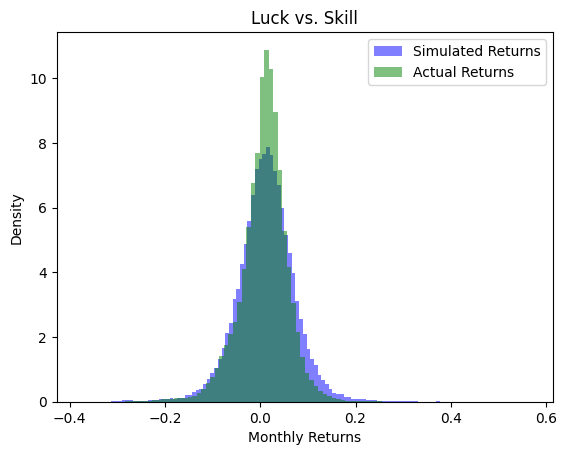

In [17]:
import matplotlib.pyplot as plt

# Data
data1 = simdf['ret']
data2 = mfret['mret']

# Plotting overlapping histograms 
plt.hist(data1, bins=100, color='blue', alpha=0.5, label='Simulated Returns', density=True)
plt.hist(data2, bins=100, color='green', alpha=0.5, label='Actual Returns', density=True)

# Adding labels
plt.title('Luck vs. Skill')
plt.xlabel('Monthly Returns')
plt.ylabel('Density')
plt.legend()

plt.show()